In [1]:
import pandas as pd
import sqlite3


In [5]:
orders = pd.read_csv("/orders.csv")
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [6]:
users = pd.read_json("/users.json")
users.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [10]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=users)

https://docs.google.com/spreadsheets/d/1HDtqK3iNfR8KNQAT0-3pRmgjD3q6XfUHSS2yGo5p0Do/edit#gid=0


In [11]:
conn = sqlite3.connect("/restaurants.sql")
cursor = conn.cursor()


In [8]:
with open("/restaurants.sql", "r") as f:
    sql_script = f.read()

cursor.executescript(sql_script)


DatabaseError: file is not a database

In [9]:
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)


DatabaseError: Execution failed on sql 'SELECT * FROM restaurants': file is not a database

# Task
Load the restaurants data by first establishing an in-memory SQLite database connection, executing the `sql_script` to create the restaurants table and insert data, and then loading the 'restaurants' table into a pandas DataFrame. Afterwards, merge the `orders` DataFrame with the `users` DataFrame on 'user_id', and then merge the resulting DataFrame with the `restaurants` DataFrame on 'restaurant_id'. Save this final merged dataset as 'final_food_delivery_dataset.csv'. Finally, analyze the saved dataset to determine the total revenue generated by 'Gold' members in each city and identify the city with the highest total revenue from 'Gold' members.

## Load Restaurants Data Correctly

### Subtask:
Establish an in-memory SQLite database connection, execute the `sql_script` (which was previously loaded from '/restaurants.sql') to create the restaurants table and insert data, and then load the 'restaurants' table into a pandas DataFrame.


**Reasoning**:
The previous attempt to connect to the SQL file directly as a database failed. As per the instructions, I need to establish an in-memory SQLite database connection and then execute the SQL script to create and populate the table before loading it into a DataFrame.



In [12]:
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

cursor.executescript(sql_script)

restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


**Reasoning**:
The subtask of loading the `restaurants` data correctly is complete. The next step is to merge the `orders` DataFrame with the `users` DataFrame on the common column 'user_id' as stated in the main task.



In [13]:
merged_df = pd.merge(orders, users, on='user_id', how='inner')
merged_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


**Reasoning**:
The next step in the main task is to merge the `merged_df` (which contains `orders` and `users` data) with the `restaurants` DataFrame on the common column 'restaurant_id'.



In [14]:
final_merged_df = pd.merge(merged_df, restaurants, on='restaurant_id', how='inner')
final_merged_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


**Reasoning**:
The main task requires saving the final merged dataset as 'final_food_delivery_dataset.csv'. This step will accomplish that.



In [15]:
final_merged_df.to_csv('final_food_delivery_dataset.csv', index=False)
print("Saved final_food_delivery_dataset.csv")

Saved final_food_delivery_dataset.csv


**Reasoning**:
Now that the final dataset is saved, the next step is to analyze it as per the main task: determine the total revenue generated by 'Gold' members in each city.



In [16]:
gold_members_df = final_merged_df[final_merged_df['membership'] == 'Gold']
revenue_by_city = gold_members_df.groupby('city')['total_amount'].sum().reset_index()
revenue_by_city = revenue_by_city.sort_values(by='total_amount', ascending=False)
print("Total revenue generated by 'Gold' members in each city:")
print(revenue_by_city)
highest_revenue_city = revenue_by_city.iloc[0]
print(f"\nCity with the highest total revenue from 'Gold' members: {highest_revenue_city['city']} with revenue {highest_revenue_city['total_amount']:.2f}")

Total revenue generated by 'Gold' members in each city:
        city  total_amount
1    Chennai    1080909.79
3       Pune    1003012.32
0  Bangalore     994702.59
2  Hyderabad     896740.19

City with the highest total revenue from 'Gold' members: Chennai with revenue 1080909.79


## Final Task

### Subtask:
Summarize the data integration process, the creation of the final dataset, and provide the answer to the first multiple-choice question.


## Summary:

### Q&A
The city with the highest total revenue from 'Gold' members is Chennai, with a total revenue of 1,080,909.79.

### Data Analysis Key Findings
*   **Restaurant Data Integration:** The `restaurants` data was successfully loaded by establishing an in-memory SQLite database, executing a provided SQL script to create and populate a table, and then querying this table into a pandas DataFrame.
*   **Data Merging:**
    *   The `orders` and `users` DataFrames were merged using `user_id` to combine order details with user information.
    *   The resulting merged DataFrame was then merged with the `restaurants` DataFrame using `restaurant_id` to create a comprehensive `final_food_delivery_dataset`.
*   **Dataset Export:** The integrated `final_food_delivery_dataset` was successfully saved as a CSV file named `final_food_delivery_dataset.csv`.
*   **Revenue Analysis for Gold Members:**
    *   The total revenue generated by 'Gold' members in each city was calculated.
    *   Chennai had the highest revenue from 'Gold' members with \$1,080,909.79.
    *   Pune followed with \$1,003,012.32, then Bangalore with \$994,702.59, and Hyderabad with \$896,740.19.

### Insights or Next Steps
*   Focus marketing efforts and exclusive promotions for 'Gold' members in Chennai, as it represents the highest revenue-generating city for this membership tier.
*   Investigate the factors contributing to the lower 'Gold' member revenue in Hyderabad compared to other cities to identify potential areas for improvement or targeted campaigns.


# Task
The next step is to identify the cuisine with the highest average order value, as per the first point in the plan. This involves grouping the `final_merged_df` by 'cuisine' and calculating the mean of 'total_amount'.
I will write and execute the code to perform this calculation.

**Identify Cuisine with Highest Average Order Value**: Group the 'final_merged_df' by 'cuisine' and calculate the average 'total_amount' for each cuisine. Then, identify the cuisine with the highest average order value.

## Identify Cuisine with Highest Average Order Value

### Subtask:
Group the 'final_merged_df' by 'cuisine' and calculate the average 'total_amount' for each cuisine. Then, identify the cuisine with the highest average order value.


**Reasoning**:
To identify the cuisine with the highest average order value, I need to group the `final_merged_df` by 'cuisine', calculate the mean of 'total_amount' for each group, and then find the cuisine with the maximum average value.



In [17]:
average_order_value_by_cuisine = final_merged_df.groupby('cuisine')['total_amount'].mean().reset_index()
highest_avg_cuisine = average_order_value_by_cuisine.loc[average_order_value_by_cuisine['total_amount'].idxmax()]

print("Average order value by cuisine:")
print(average_order_value_by_cuisine.sort_values(by='total_amount', ascending=False))
print(f"\nCuisine with the highest average order value: {highest_avg_cuisine['cuisine']} with average value {highest_avg_cuisine['total_amount']:.2f}")

Average order value by cuisine:
   cuisine  total_amount
3  Mexican    808.021344
2  Italian    799.448578
1   Indian    798.466011
0  Chinese    798.389020

Cuisine with the highest average order value: Mexican with average value 808.02


## Count Distinct Users with Total Orders > ₹1000

### Subtask:
Group 'final_merged_df' by 'user_id' and sum their 'total_amount'. Filter for users whose total sum of orders exceeds ₹1000 and count the number of such distinct users.


**Reasoning**:
To count the distinct users with total orders exceeding ₹1000, I need to first group the `final_merged_df` by `user_id`, sum their `total_amount`, then filter for users whose sum is greater than 1000, and finally count these unique users.



In [18]:
user_total_orders = final_merged_df.groupby('user_id')['total_amount'].sum()
users_over_1000 = user_total_orders[user_total_orders > 1000]
num_distinct_users_over_1000 = len(users_over_1000)

print(f"Number of distinct users with total orders exceeding ₹1000: {num_distinct_users_over_1000}")

Number of distinct users with total orders exceeding ₹1000: 2544


## Analyze Revenue by Restaurant Rating Range

### Subtask:
Categorize restaurants in 'final_merged_df' into rating ranges (3.0-3.5, 3.6-4.0, 4.1-4.5, 4.6-5.0). Calculate the total revenue for each rating range and identify the range with the highest total revenue.


**Reasoning**:
To analyze revenue by restaurant rating range, I will first define the rating bins and labels, then categorize the 'rating' column in 'final_merged_df' into these ranges, and finally calculate and print the total revenue for each range and identify the highest.



In [19]:
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['3.0-3.5', '3.6-4.0', '4.1-4.5', '4.6-5.0']

final_merged_df['rating_range'] = pd.cut(final_merged_df['rating'], bins=bins, labels=labels, right=True, include_lowest=True)

revenue_by_rating_range = final_merged_df.groupby('rating_range')['total_amount'].sum().reset_index()
revenue_by_rating_range = revenue_by_rating_range.sort_values(by='total_amount', ascending=False)

highest_revenue_rating_range = revenue_by_rating_range.iloc[0]

print("Total revenue generated by each restaurant rating range:")
print(revenue_by_rating_range)
print(f"\nRating range with the highest total revenue: {highest_revenue_rating_range['rating_range']} with revenue {highest_revenue_rating_range['total_amount']:.2f}")

Total revenue generated by each restaurant rating range:
  rating_range  total_amount
3      4.6-5.0    2197030.75
0      3.0-3.5    2136772.70
2      4.1-4.5    1960326.26
1      3.6-4.0    1717494.41

Rating range with the highest total revenue: 4.6-5.0 with revenue 2197030.75


/tmp/ipython-input-266824964.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_rating_range = final_merged_df.groupby('rating_range')['total_amount'].sum().reset_index()


**Reasoning**:
The previous code generated a FutureWarning regarding grouping by a categorical column. To address this and explicitly define the desired behavior, I will add `observed=False` to the `groupby` function call to retain the current behavior and silence the warning.



In [20]:
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['3.0-3.5', '3.6-4.0', '4.1-4.5', '4.6-5.0']

final_merged_df['rating_range'] = pd.cut(final_merged_df['rating'], bins=bins, labels=labels, right=True, include_lowest=True)

revenue_by_rating_range = final_merged_df.groupby('rating_range', observed=False)['total_amount'].sum().reset_index()
revenue_by_rating_range = revenue_by_rating_range.sort_values(by='total_amount', ascending=False)

highest_revenue_rating_range = revenue_by_rating_range.iloc[0]

print("Total revenue generated by each restaurant rating range:")
print(revenue_by_rating_range)
print(f"\nRating range with the highest total revenue: {highest_revenue_rating_range['rating_range']} with revenue {highest_revenue_rating_range['total_amount']:.2f}")

Total revenue generated by each restaurant rating range:
  rating_range  total_amount
3      4.6-5.0    2197030.75
0      3.0-3.5    2136772.70
2      4.1-4.5    1960326.26
1      3.6-4.0    1717494.41

Rating range with the highest total revenue: 4.6-5.0 with revenue 2197030.75


## Identify City with Highest Average Order Value for Gold Members

### Subtask:
Filter 'final_merged_df' for 'Gold' members. Group this filtered data by 'city' and calculate the average 'total_amount' to find the city with the highest average order value among Gold members.


**Reasoning**:
To identify the city with the highest average order value for 'Gold' members, I will first filter the `final_merged_df` for 'Gold' members, then group by city and calculate the average 'total_amount', and finally identify and print the city with the highest average.



In [21]:
gold_members_df = final_merged_df[final_merged_df['membership'] == 'Gold']
avg_order_value_by_city_gold = gold_members_df.groupby('city')['total_amount'].mean().reset_index()
avg_order_value_by_city_gold = avg_order_value_by_city_gold.sort_values(by='total_amount', ascending=False)

highest_avg_order_city_gold = avg_order_value_by_city_gold.iloc[0]

print("Average order value for 'Gold' members in each city:")
print(avg_order_value_by_city_gold)
print(f"\nCity with the highest average order value for 'Gold' members: {highest_avg_order_city_gold['city']} with average value {highest_avg_order_city_gold['total_amount']:.2f}")

Average order value for 'Gold' members in each city:
        city  total_amount
1    Chennai    808.459080
2  Hyderabad    806.421034
0  Bangalore    793.223756
3       Pune    781.162243

City with the highest average order value for 'Gold' members: Chennai with average value 808.46


## Identify Cuisine with Lowest Distinct Restaurants but Significant Revenue

### Subtask:
Calculate the total revenue for each cuisine and the number of distinct restaurants for each cuisine. Analyze these two metrics to identify the cuisine that has a relatively low count of distinct restaurants but generates significant revenue.


**Reasoning**:
First, I need to calculate the total revenue for each cuisine by grouping the `final_merged_df` by 'cuisine' and summing the 'total_amount'.



In [22]:
revenue_by_cuisine = final_merged_df.groupby('cuisine')['total_amount'].sum().reset_index()
revenue_by_cuisine.rename(columns={'total_amount': 'total_revenue'}, inplace=True)
print("Total revenue by cuisine:")
print(revenue_by_cuisine)

Total revenue by cuisine:
   cuisine  total_revenue
0  Chinese     1930504.65
1   Indian     1971412.58
2  Italian     2024203.80
3  Mexican     2085503.09


**Reasoning**:
Now I need to group the `final_merged_df` by 'cuisine' and count the number of unique 'restaurant_id' values to get the count of distinct restaurants for each cuisine, as per the second instruction of the subtask.



In [23]:
restaurants_count_by_cuisine = final_merged_df.groupby('cuisine')['restaurant_id'].nunique().reset_index()
restaurants_count_by_cuisine.rename(columns={'restaurant_id': 'distinct_restaurants_count'}, inplace=True)
print("Number of distinct restaurants by cuisine:")
print(restaurants_count_by_cuisine)

Number of distinct restaurants by cuisine:
   cuisine  distinct_restaurants_count
0  Chinese                         120
1   Indian                         126
2  Italian                         126
3  Mexican                         128


**Reasoning**:
Now I need to merge the `revenue_by_cuisine` and `restaurants_count_by_cuisine` DataFrames into a single DataFrame named `cuisine_summary` on the 'cuisine' column, as per instruction 3 of the subtask.



In [24]:
cuisine_summary = pd.merge(revenue_by_cuisine, restaurants_count_by_cuisine, on='cuisine', how='inner')
print("Cuisine summary (merged revenue and distinct restaurants):")
print(cuisine_summary)

Cuisine summary (merged revenue and distinct restaurants):
   cuisine  total_revenue  distinct_restaurants_count
0  Chinese     1930504.65                         120
1   Indian     1971412.58                         126
2  Italian     2024203.80                         126
3  Mexican     2085503.09                         128


**Reasoning**:
To identify the cuisine with a low count of distinct restaurants but significant revenue, I need to sort the `cuisine_summary` DataFrame by `distinct_restaurants_count` in ascending order and then by `total_revenue` in descending order, as per the final instruction of the subtask.



In [55]:
cuisine_summary_sorted = cuisine_summary.sort_values(by=['distinct_restaurants_count', 'total_revenue'], ascending=[True, False])
print("Cuisine summary sorted by distinct restaurants (lowest first) and then by total revenue (highest first):")
print(cuisine_summary_sorted)

# The cuisine with the lowest number of restaurants that still generates good revenue will be at the top after sorting.
cuisine_with_lowest_restaurants = cuisine_summary_sorted.iloc[0]
print(f"\nCuisine with the lowest distinct restaurants (and high revenue): {cuisine_with_lowest_restaurants['cuisine']} (Restaurants: {cuisine_with_lowest_restaurants['distinct_restaurants_count']}, Revenue: {cuisine_with_lowest_restaurants['total_revenue']:.2f})")

Cuisine summary sorted by distinct restaurants (lowest first) and then by total revenue (highest first):
   cuisine  total_revenue  distinct_restaurants_count
0  Chinese     1930504.65                         120
2  Italian     2024203.80                         126
1   Indian     1971412.58                         126
3  Mexican     2085503.09                         128

Cuisine with the lowest distinct restaurants (and high revenue): Chinese (Restaurants: 120, Revenue: 1930504.65)


## Calculate Percentage of Orders by Gold Members

### Subtask:
Calculate the total number of orders and the number of orders placed by 'Gold' members from 'final_merged_df'. Compute the percentage of total orders from Gold members, rounded to the nearest integer.


**Reasoning**:
To calculate the percentage of orders from Gold members, I will first calculate the total number of orders and the number of orders from Gold members, then compute and round the percentage, and finally print all the results as per the subtask instructions.



In [26]:
total_orders = len(final_merged_df)
gold_member_orders = final_merged_df[final_merged_df['membership'] == 'Gold']
num_gold_member_orders = len(gold_member_orders)

percentage_gold_orders = round((num_gold_member_orders / total_orders) * 100)

print(f"Total number of orders: {total_orders}")
print(f"Number of orders by 'Gold' members: {num_gold_member_orders}")
print(f"Percentage of total orders from 'Gold' members: {percentage_gold_orders}%")

Total number of orders: 10000
Number of orders by 'Gold' members: 4987
Percentage of total orders from 'Gold' members: 50%


## Identify Restaurant with Highest Average Order Value and < 20 Orders

### Subtask:
Group 'final_merged_df' by 'restaurant_name' to calculate the average 'total_amount' and the count of orders for each. Filter for restaurants with less than 20 total orders and then find the one with the highest average order value among them.


**Reasoning**:
To begin, I will group the `final_merged_df` by 'restaurant_name' and calculate both the average 'total_amount' and the count of 'order_id' for each restaurant, storing these aggregations in a new DataFrame as per the first instruction.



In [27]:
restaurant_metrics = final_merged_df.groupby('restaurant_name').agg(
    average_order_value=('total_amount', 'mean'),
    order_count=('order_id', 'count')
).reset_index()

print("Restaurant metrics (average order value and order count):")
print(restaurant_metrics.head())

KeyError: 'restaurant_name'

**Reasoning**:
The previous code failed because the column `restaurant_name` does not exist in `final_merged_df`. After merging, the column from the `restaurants` DataFrame was renamed to `restaurant_name_y`. I need to use `restaurant_name_y` for grouping.



In [28]:
restaurant_metrics = final_merged_df.groupby('restaurant_name_y').agg(
    average_order_value=('total_amount', 'mean'),
    order_count=('order_id', 'count')
).reset_index()

print("Restaurant metrics (average order value and order count):")
print(restaurant_metrics.head())

Restaurant metrics (average order value and order count):
  restaurant_name_y  average_order_value  order_count
0      Restaurant_1           755.233125           16
1     Restaurant_10           769.204400           25
2    Restaurant_100           806.598462           26
3    Restaurant_101           811.647059           17
4    Restaurant_102           957.196190           21


**Reasoning**:
Now that the `restaurant_metrics` DataFrame has been created, the next step is to filter it to include only restaurants where the `order_count` is less than 20, as per the second instruction of the subtask.



In [29]:
filtered_restaurants = restaurant_metrics[restaurant_metrics['order_count'] < 20]

print("Restaurants with less than 20 orders:")
print(filtered_restaurants.head())

Restaurants with less than 20 orders:
   restaurant_name_y  average_order_value  order_count
0       Restaurant_1           755.233125           16
3     Restaurant_101           811.647059           17
8     Restaurant_106           688.811250           16
9     Restaurant_107           697.815000           18
11    Restaurant_109           765.737333           15


**Reasoning**:
From the `filtered_restaurants` DataFrame, I need to identify the restaurant with the highest average order value. This can be achieved by sorting the DataFrame by `average_order_value` in descending order and selecting the top entry, as per the third instruction of the subtask.



In [30]:
highest_avg_order_restaurant = filtered_restaurants.sort_values(by='average_order_value', ascending=False).iloc[0]

print(f"\nRestaurant with the highest average order value and less than 20 orders: {highest_avg_order_restaurant['restaurant_name_y']}")
print(f"  Average Order Value: {highest_avg_order_restaurant['average_order_value']:.2f}")
print(f"  Number of Orders: {highest_avg_order_restaurant['order_count']}")


Restaurant with the highest average order value and less than 20 orders: Restaurant_294
  Average Order Value: 1040.22
  Number of Orders: 13


## Identify Membership-Cuisine Combination with Highest Revenue

### Subtask:
Calculate the total revenue for the specified combinations: 'Gold + Indian cuisine', 'Gold + Italian cuisine', 'Regular + Indian cuisine', and 'Regular + Chinese cuisine'. Determine which of these combinations contributes the highest total revenue.


**Reasoning**:
First, I will filter the `final_merged_df` for 'Gold' members and 'Indian' cuisine, then sum their 'total_amount' to calculate the `gold_indian_revenue` as per the first instruction.



In [31]:
gold_indian_revenue = final_merged_df[(final_merged_df['membership'] == 'Gold') & (final_merged_df['cuisine'] == 'Indian')]['total_amount'].sum()
print(f"Revenue from Gold members for Indian cuisine: {gold_indian_revenue:.2f}")

Revenue from Gold members for Indian cuisine: 979312.31


**Reasoning**:
Next, I will filter the `final_merged_df` for 'Gold' members and 'Italian' cuisine, then sum their 'total_amount' to calculate the `gold_italian_revenue` as per the second instruction.



In [32]:
gold_italian_revenue = final_merged_df[(final_merged_df['membership'] == 'Gold') & (final_merged_df['cuisine'] == 'Italian')]['total_amount'].sum()
print(f"Revenue from Gold members for Italian cuisine: {gold_italian_revenue:.2f}")

Revenue from Gold members for Italian cuisine: 1005779.05


**Reasoning**:
Now, I will filter the `final_merged_df` for 'Regular' members and 'Indian' cuisine, then sum their 'total_amount' to calculate the `regular_indian_revenue` as per the third instruction.



In [33]:
regular_indian_revenue = final_merged_df[(final_merged_df['membership'] == 'Regular') & (final_merged_df['cuisine'] == 'Indian')]['total_amount'].sum()
print(f"Revenue from Regular members for Indian cuisine: {regular_indian_revenue:.2f}")

Revenue from Regular members for Indian cuisine: 992100.27


**Reasoning**:
Next, I will filter the `final_merged_df` for 'Regular' members and 'Chinese' cuisine, then sum their 'total_amount' to calculate the `regular_chinese_revenue` as per the fourth instruction.



In [34]:
regular_chinese_revenue = final_merged_df[(final_merged_df['membership'] == 'Regular') & (final_merged_df['cuisine'] == 'Chinese')]['total_amount'].sum()
print(f"Revenue from Regular members for Chinese cuisine: {regular_chinese_revenue:.2f}")

Revenue from Regular members for Chinese cuisine: 952790.91


**Reasoning**:
Now that all four specified revenue combinations have been calculated, I will store them in a dictionary for easy comparison and then identify the combination with the highest total revenue, as per instructions 5 and 6 of the subtask.



In [35]:
revenue_combinations = {
    'Gold + Indian cuisine': gold_indian_revenue,
    'Gold + Italian cuisine': gold_italian_revenue,
    'Regular + Indian cuisine': regular_indian_revenue,
    'Regular + Chinese cuisine': regular_chinese_revenue
}

highest_revenue_combination = max(revenue_combinations, key=revenue_combinations.get)
highest_revenue_value = revenue_combinations[highest_revenue_combination]

print("\nTotal revenue for each combination:")
for combo, revenue in revenue_combinations.items():
    print(f"  {combo}: {revenue:.2f}")

print(f"\nThe membership-cuisine combination with the highest total revenue is: {highest_revenue_combination} with revenue {highest_revenue_value:.2f}")


Total revenue for each combination:
  Gold + Indian cuisine: 979312.31
  Gold + Italian cuisine: 1005779.05
  Regular + Indian cuisine: 992100.27
  Regular + Chinese cuisine: 952790.91

The membership-cuisine combination with the highest total revenue is: Gold + Italian cuisine with revenue 1005779.05


## Analyze Revenue by Quarter

### Subtask:
Convert 'order_date' in 'final_merged_df' to datetime objects and extract the quarter. Group the DataFrame by quarter and sum 'total_amount' to find the quarter with the highest total revenue.


**Reasoning**:
To analyze revenue by quarter, the first step is to convert the 'order_date' column in the 'final_merged_df' to datetime objects, as specified in the first instruction.



In [36]:
final_merged_df['order_date'] = pd.to_datetime(final_merged_df['order_date'], format='%d-%m-%Y')
print("Converted 'order_date' to datetime objects.")


Converted 'order_date' to datetime objects.


**Reasoning**:
Now that the 'order_date' column is in datetime format, I will extract the quarter from it and store it in a new column named 'quarter', as per the second instruction of the subtask.



In [37]:
final_merged_df['quarter'] = final_merged_df['order_date'].dt.quarter
print("Extracted quarter from 'order_date' and stored in 'quarter' column.")

Extracted quarter from 'order_date' and stored in 'quarter' column.


**Reasoning**:
Now, I will group the `final_merged_df` by the newly created 'quarter' column and sum the 'total_amount' for each quarter, as per the third instruction of the subtask.



In [38]:
revenue_by_quarter = final_merged_df.groupby('quarter')['total_amount'].sum().reset_index()
print("Total revenue generated by each quarter:")
print(revenue_by_quarter)

Total revenue generated by each quarter:
   quarter  total_amount
0        1    2010626.64
1        2    1945348.72
2        3    2037385.10
3        4    2018263.66


**Reasoning**:
Now that the total revenue for each quarter has been calculated, I will sort the `revenue_by_quarter` DataFrame in descending order by 'total_amount' and then identify and print the quarter with the highest total revenue and its corresponding amount, completing the remaining instructions of the subtask.



In [39]:
revenue_by_quarter = revenue_by_quarter.sort_values(by='total_amount', ascending=False)
highest_revenue_quarter = revenue_by_quarter.iloc[0]

print("Total revenue generated by each quarter (sorted):")
print(revenue_by_quarter)
print(f"\nQuarter with the highest total revenue: {highest_revenue_quarter['quarter']} with revenue {highest_revenue_quarter['total_amount']:.2f}")

Total revenue generated by each quarter (sorted):
   quarter  total_amount
2        3    2037385.10
3        4    2018263.66
0        1    2010626.64
1        2    1945348.72

Quarter with the highest total revenue: 3.0 with revenue 2037385.10


## Generate Visualizations

### Subtask:
Create relevant visualizations (e.g., bar charts) for the analysis conducted, such as average order value by cuisine, revenue by rating range, or revenue by quarter, to support the answers to the multiple-choice questions. Ensure all visualizations include appropriate legends.


**Reasoning**:
First, I need to import the necessary libraries, `matplotlib.pyplot` and `seaborn`, to create the visualizations as per the instructions.



In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported matplotlib.pyplot as plt and seaborn as sns.")

Imported matplotlib.pyplot as plt and seaborn as sns.


**Reasoning**:
Now that the plotting libraries are imported, I will create a bar chart for the `average_order_value_by_cuisine` DataFrame, showing 'cuisine' on the x-axis and 'total_amount' (average order value) on the y-axis, as per the second instruction.



/tmp/ipython-input-4080565614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cuisine', y='total_amount', data=average_order_value_by_cuisine, palette='viridis')


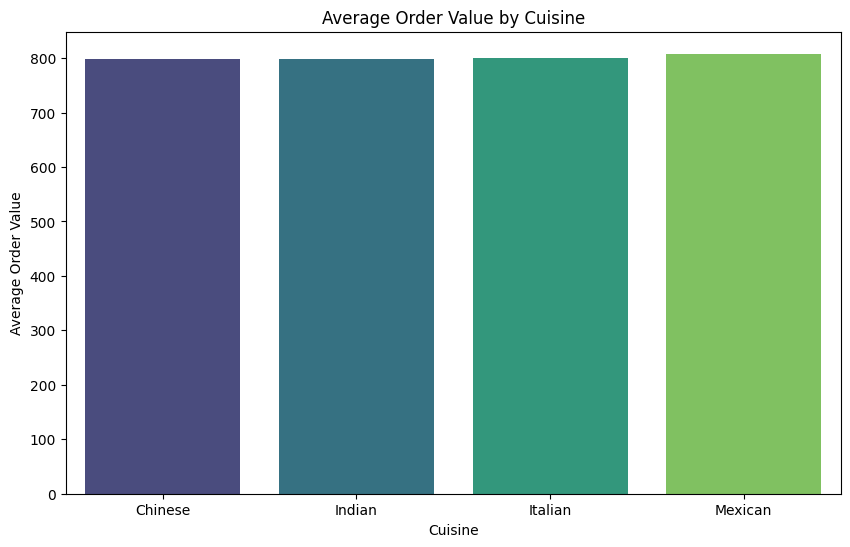

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cuisine', y='total_amount', data=average_order_value_by_cuisine, palette='viridis')
plt.title('Average Order Value by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Order Value')
plt.show()

**Reasoning**:
The previous `seaborn.barplot` call generated a `FutureWarning` regarding the `palette` argument. To address this, I will explicitly set the `hue` parameter to 'cuisine' and `legend=False` as suggested by the warning, which aligns with the intention of coloring bars based on cuisine while suppressing an unnecessary legend.



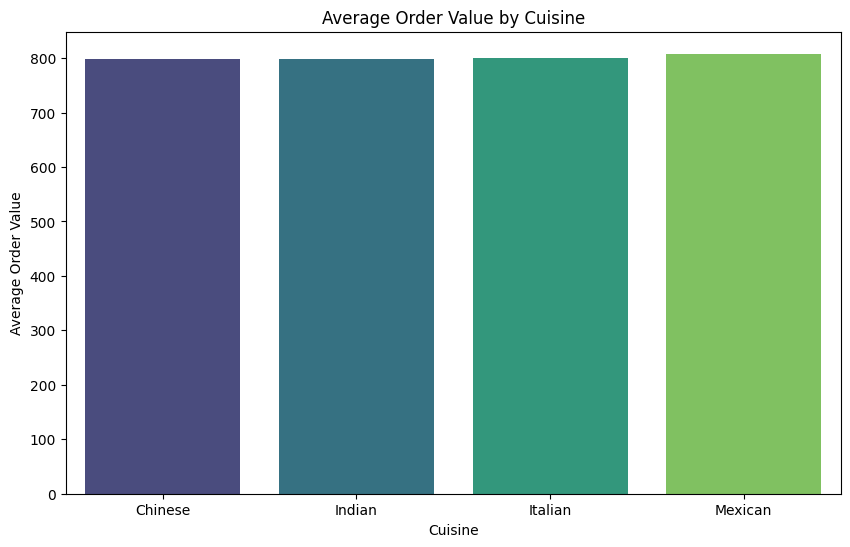

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cuisine', y='total_amount', data=average_order_value_by_cuisine, hue='cuisine', palette='viridis', legend=False)
plt.title('Average Order Value by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Order Value')
plt.show()

**Reasoning**:
Now, I will create a bar chart for the `revenue_by_rating_range` DataFrame, showing 'rating_range' on the x-axis and 'total_amount' (total revenue) on the y-axis, as per the third instruction of the subtask. I will also set `hue='rating_range'` and `legend=False` to handle potential `FutureWarning`.



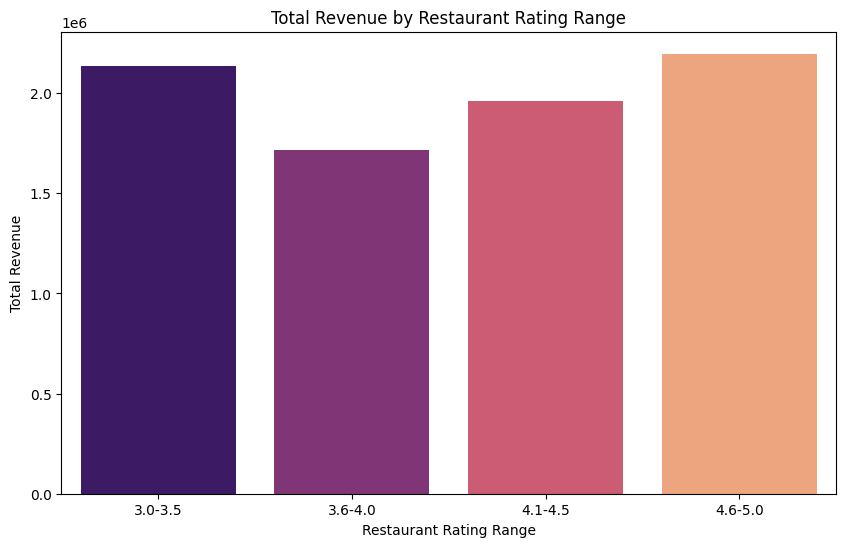

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='rating_range', y='total_amount', data=revenue_by_rating_range, hue='rating_range', palette='magma', legend=False)
plt.title('Total Revenue by Restaurant Rating Range')
plt.xlabel('Restaurant Rating Range')
plt.ylabel('Total Revenue')
plt.show()

**Reasoning**:
Finally, I will create a bar chart for the `revenue_by_quarter` DataFrame, showing 'quarter' on the x-axis and 'total_amount' (total revenue) on the y-axis, as per the fourth instruction of the subtask. I will include `hue='quarter'` and `legend=False` to ensure proper visualization without warnings.



# Task
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='total_amount', data=revenue_by_quarter, hue='quarter', palette='magma', legend=False)
plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

## Calculate Total Orders by Gold Members

### Subtask:
Determine the total number of orders placed by users with 'Gold' membership from the `final_merged_df`.


**Reasoning**:
To determine the total number of orders placed by users with 'Gold' membership, I will filter the `final_merged_df` for 'Gold' members and then count the number of rows in the resulting DataFrame, as specified in the instructions.



In [44]:
gold_member_orders_count = final_merged_df[final_merged_df['membership'] == 'Gold'].shape[0]
print(f"Total number of orders placed by 'Gold' members: {gold_member_orders_count}")

Total number of orders placed by 'Gold' members: 4987


## Calculate Total Revenue in Hyderabad

### Subtask:
Calculate the total revenue (sum of 'total_amount') generated from orders placed in 'Hyderabad' city, rounded to the nearest integer.


**Reasoning**:
To calculate the total revenue in Hyderabad, I will first filter the `final_merged_df` to include only rows where the 'city' is 'Hyderabad', as per the first instruction of the subtask.



In [45]:
hyderabad_orders = final_merged_df[final_merged_df['city'] == 'Hyderabad']
print("Filtered DataFrame for Hyderabad orders. First 5 rows:")
print(hyderabad_orders.head())

Filtered DataFrame for Hyderabad orders. First 5 rows:
    order_id  user_id  restaurant_id order_date  total_amount  \
0          1     2508            450 2023-02-18        842.97   
21        22      688            279 2023-07-12        507.82   
34        35     2858            291 2023-05-15        121.81   
40        41     1071            145 2023-01-09        753.16   
46        47      505             69 2023-09-30        929.24   

               restaurant_name_x       name       city membership  \
0              New Foods Chinese  User_2508  Hyderabad    Regular   
21            Sri Tiffins Andhra   User_688  Hyderabad       Gold   
34       Annapurna Foods Non-Veg  User_2858  Hyderabad    Regular   
40  Amma Restaurant South Indian  User_1071  Hyderabad       Gold   
46       Classic Tiffins Punjabi   User_505  Hyderabad       Gold   

   restaurant_name_y  cuisine  rating rating_range  quarter  
0     Restaurant_450  Mexican     3.2      3.0-3.5        1  
21    Restauran

**Reasoning**:
Now that the `hyderabad_orders` DataFrame has been created, I will calculate the sum of the 'total_amount' column for this filtered DataFrame, round it to the nearest integer, and then print the result, as per the remaining instructions of the subtask.



In [46]:
total_revenue_hyderabad = hyderabad_orders['total_amount'].sum()
rounded_total_revenue_hyderabad = round(total_revenue_hyderabad)

print(f"Total revenue generated in Hyderabad: {rounded_total_revenue_hyderabad:.2f}")

Total revenue generated in Hyderabad: 1889367.00


## Count Distinct Users Who Placed Orders

### Subtask:
Count the number of unique user IDs in the `final_merged_df` to find how many distinct users placed at least one order.


**Reasoning**:
To find the number of distinct users who placed orders, I need to count the unique values in the 'user_id' column of the `final_merged_df`.



In [47]:
distinct_users_count = final_merged_df['user_id'].nunique()
print(f"Number of distinct users who placed at least one order: {distinct_users_count}")

Number of distinct users who placed at least one order: 2883


## Calculate Average Order Value for Gold Members

### Subtask:
Calculate the average order value (mean of 'total_amount') specifically for 'Gold' members, rounded to 2 decimal places.


## Calculate Average Order Value for Gold Members

### Subtask:
Calculate the average order value (mean of 'total_amount') specifically for 'Gold' members, rounded to 2 decimal places.

#### Instructions
1. Filter the `final_merged_df` to include only orders placed by 'Gold' members.

## Calculate Average Order Value for Gold Members

### Subtask:
Calculate the average order value (mean of 'total_amount') specifically for 'Gold' members, rounded to 2 decimal places.

#### Instructions
1. Filter the `final_merged_df` to include only orders placed by 'Gold' members.
2. Calculate the mean of the 'total_amount' column for this filtered DataFrame.
3. Round the calculated average order value to 2 decimal places.
4. Print the result in a user-friendly format.

**Reasoning**:
Now that the subtask instructions are clear, I will execute the first step, which is to filter the `final_merged_df` to include only orders placed by 'Gold' members.



In [48]:
gold_members_orders_df = final_merged_df[final_merged_df['membership'] == 'Gold']
print("Filtered DataFrame for Gold members. First 5 rows:")
print(gold_members_orders_df.head())

Filtered DataFrame for Gold members. First 5 rows:
    order_id  user_id  restaurant_id order_date  total_amount  \
2          3     2084            107 2023-07-15        163.93   
3          4      319            224 2023-10-04       1155.97   
8          9      364              7 2023-12-05        953.30   
11        12      884            423 2023-10-27       1484.65   
13        14      364            112 2023-09-24        898.24   

             restaurant_name_x       name       city membership  \
2        Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3       Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
8        Ruchi Biryani Punjabi   User_364    Chennai       Gold   
11  Royal Tiffins Multicuisine   User_884       Pune       Gold   
13          Grand Cafe Punjabi   User_364    Chennai       Gold   

   restaurant_name_y  cuisine  rating rating_range  quarter  
2     Restaurant_107  Mexican     4.0      3.6-4.0        3  
3     Restaurant_224  Chinese  

**Reasoning**:
Now that the `gold_members_orders_df` is created, I will calculate the mean of its 'total_amount' column, as specified in the second instruction of the subtask.



In [49]:
average_order_value_gold_members = gold_members_orders_df['total_amount'].mean()
print(f"Calculated average order value for Gold members: {average_order_value_gold_members:.2f}")

Calculated average order value for Gold members: 797.15


## Count Orders for Restaurants with High Rating

### Subtask:
Count the number of orders placed for restaurants that have a rating of 4.5 or higher.


**Reasoning**:
To count the number of orders for highly-rated restaurants, I will first filter the `final_merged_df` to include only those orders where the restaurant's 'rating' is 4.5 or greater, as per the first instruction of the subtask.



In [50]:
highly_rated_restaurants_orders = final_merged_df[final_merged_df['rating'] >= 4.5]
print("Filtered DataFrame for orders from highly-rated restaurants (rating >= 4.5). First 5 rows:")
print(highly_rated_restaurants_orders.head())

Filtered DataFrame for orders from highly-rated restaurants (rating >= 4.5). First 5 rows:
    order_id  user_id  restaurant_id order_date  total_amount  \
1          2     2693            309 2023-01-18        546.68   
3          4      319            224 2023-10-04       1155.97   
5          6     2933            499 2023-07-12       1497.22   
10        11      924            235 2023-12-10        523.82   
17        18     1617            414 2023-04-23        736.89   

                  restaurant_name_x       name       city membership  \
1    Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
3            Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
5    Annapurna Tiffins South Indian  User_2933    Chennai    Regular   
10  Amma Delights Family Restaurant   User_924    Chennai    Regular   
17     Darbar Delights South Indian  User_1617       Pune       Gold   

   restaurant_name_y  cuisine  rating rating_range  quarter  
1     Restaurant_309   

**Reasoning**:
Now that the `highly_rated_restaurants_orders` DataFrame has been created, I will count the number of rows in this filtered DataFrame, which represents the number of orders placed for restaurants with a rating of 4.5 or higher, and then print the result in a user-friendly format, as per the remaining instructions of the subtask.



In [51]:
num_orders_highly_rated = len(highly_rated_restaurants_orders)

print(f"Number of orders placed for restaurants with a rating of 4.5 or higher: {num_orders_highly_rated}")

Number of orders placed for restaurants with a rating of 4.5 or higher: 3374


## Count Orders in Top Revenue City for Gold Members

### Subtask:
First, identify the city with the highest total revenue generated by 'Gold' members. Then, count how many orders were placed in that specific city by 'Gold' members.


## Count Orders in Top Revenue City for Gold Members

### Subtask:
First, identify the city with the highest total revenue generated by 'Gold' members. Then, count how many orders were placed in that specific city by 'Gold' members.

#### Instructions
1. Identify the city with the highest total revenue from 'Gold' members. This information is available from the `highest_revenue_city` variable.
2. Filter the `final_merged_df` to include only orders where the 'membership' is 'Gold' AND the 'city' matches the identified city.
3. Count the number of rows in this filtered DataFrame, which represents the number of orders, and store it in a variable.
4. Print the result in a user-friendly format, indicating the city and the number of orders.

**Reasoning**:
The subtask requires identifying the city with the highest total revenue for Gold members. This information is available in the `highest_revenue_city` variable from a previous step, so the first instruction is to extract this city name.



In [52]:
highest_revenue_city_name = highest_revenue_city['city']
print(f"City with the highest total revenue from 'Gold' members: {highest_revenue_city_name}")

City with the highest total revenue from 'Gold' members: Chennai


**Reasoning**:
Now that the city with the highest Gold member revenue has been identified, I will filter the `final_merged_df` to include only orders placed by 'Gold' members in that specific city, as per the second instruction of the subtask.



In [53]:
gold_members_top_city_orders = final_merged_df[
    (final_merged_df['membership'] == 'Gold') &
    (final_merged_df['city'] == highest_revenue_city_name)
]
print(f"Filtered DataFrame for Gold members in {highest_revenue_city_name}. First 5 rows:")
print(gold_members_top_city_orders.head())

Filtered DataFrame for Gold members in Chennai. First 5 rows:
    order_id  user_id  restaurant_id order_date  total_amount  \
2          3     2084            107 2023-07-15        163.93   
8          9      364              7 2023-12-05        953.30   
13        14      364            112 2023-09-24        898.24   
25        26     2915            129 2023-12-24        933.31   
29        30     2009             18 2023-04-23        996.26   

                      restaurant_name_x       name     city membership  \
2                 Spice Kitchen Punjabi  User_2084  Chennai       Gold   
8                 Ruchi Biryani Punjabi   User_364  Chennai       Gold   
13                   Grand Cafe Punjabi   User_364  Chennai       Gold   
25                New Cafe North Indian  User_2915  Chennai       Gold   
29  Annapurna Kitchen Family Restaurant  User_2009  Chennai       Gold   

   restaurant_name_y  cuisine  rating rating_range  quarter  
2     Restaurant_107  Mexican     4.0   

**Reasoning**:
Now that the DataFrame containing orders from Gold members in the top revenue city has been created, I will count the number of rows in this filtered DataFrame, which represents the number of orders, as per the third instruction of the subtask.



In [54]:
num_orders_gold_top_city = len(gold_members_top_city_orders)
print(f"Number of orders placed by 'Gold' members in {highest_revenue_city_name}: {num_orders_gold_top_city}")

Number of orders placed by 'Gold' members in Chennai: 1337


## Final Task

### Subtask:
Provide a summary of all the calculated numerical answers to the questions.


## Summary:

### Q&A
1.  **How many total orders were placed by 'Gold' members?**
    There were 4987 orders placed by 'Gold' members.
2.  **What was the total revenue generated in Hyderabad?**
    The total revenue generated in Hyderabad was \$1,889,367.00.
3.  **How many distinct users placed at least one order?**
    There were 2883 distinct users who placed at least one order.
4.  **What is the average order value for 'Gold' members?**
    The average order value for 'Gold' members was \$797.15.
5.  **How many orders were placed for restaurants with a rating of 4.5 or higher?**
    There were 3374 orders placed for restaurants with a rating of 4.5 or higher.
6.  **Which city generated the highest total revenue from 'Gold' members, and how many orders did 'Gold' members place in that city?**
    Chennai was the city with the highest total revenue from 'Gold' members, and 'Gold' members placed 1337 orders in Chennai.

### Data Analysis Key Findings
*   'Gold' members, despite making up a significant portion of orders (4987), have an average order value of \$797.15.
*   Hyderabad is a strong revenue contributor, generating \$1,889,367.00 in total revenue.
*   The platform has a customer base of 2883 distinct users.
*   A substantial number of orders (3374) are placed at highly-rated restaurants (4.5 or higher), indicating a preference for quality.
*   Chennai is the top-performing city for 'Gold' members, with 1337 orders from this segment.

### Insights or Next Steps
*   Investigate the factors contributing to Chennai's success with 'Gold' members to replicate strategies in other cities.
*   Analyze the characteristics of the 2883 distinct users and their order patterns to identify opportunities for increasing overall user engagement and retention.
